<a href="https://colab.research.google.com/github/kurpeeren/control-algorithms/blob/main/pid_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Giriş



## Kontrol Sistemlerine Giriş ve Projenin Amacı

**Kontrol sistemleri**, bir sistemin davranışını istenen bir referans değerine getirmek veya o değerde tutmak için kullanılan mekanizmalardır. Günlük hayatımızda kullandığımız birçok teknolojik ürün, karmaşık endüstriyel prosesler ve hatta biyolojik sistemler dahi kontrol sistemleri sayesinde kararlı ve verimli bir şekilde çalışır. Örneğin, bir klimanın oda sıcaklığını sabit tutması, bir aracın hız sabitleyicisinin (cruise control) belirlenen hızda gitmesi veya bir roketin yörüngesinde kalması kontrol sistemlerinin başarısıdır. Bu sistemler, sensörler aracılığıyla sistemin mevcut durumunu ölçer, bu durumu istenen durumla karşılaştırır ve aradaki farkı (hata) azaltmak için gerekli müdahaleyi yapar. Bu nedenle, kontrol sistemleri mühendislik ve teknolojinin temel taşlarından biridir.

Bu çalışmanın temel amacı, kontrol sistemlerinin en yaygın kullanılan algoritmaları olan **P (Oransal), PI (Oransal-İntegral), PD (Oransal-Türevsel) ve PID (Oransal-İntegral-Türevsel)** kontrolcüleri öğretici bir yaklaşımla sunmaktır. Bu algoritmaların teorik temelleri açıklandıktan sonra, basit bir sistem modeli üzerinde Python ile simülasyonları gerçekleştirilecektir. Simülasyon sonuçları üzerinden her bir algoritmanın performansı (tepki hızı, kalıcı durum hatası, aşım vb.) analiz edilecek ve birbirleriyle karşılaştırılacaktır.

Bu çalışma, özellikle **kontrol sistemlerine yeni başlayanlar, mühendislik öğrencileri ve konuya ilgi duyan herkes** için bir başlangıç noktası olmayı hedeflemektedir. Karmaşık matematiksel ispatlardan ziyade, sezgisel anlama ve pratik uygulama üzerine odaklanılarak, kontrol algoritmalarının temel mantığının ve sistem davranışına etkilerinin kolayca kavranması amaçlanmaktadır.



## Temel Kontrol Kavramları: Açık Döngü ve Kapalı Döngü Kontrol

Kontrol sistemleri, temel olarak iki ana kategoriye ayrılır: Açık Döngü (Open-Loop) ve Kapalı Döngü (Closed-Loop) kontrol sistemleri. Bu iki yaklaşım, bir sistemin çıktısını kontrol etmek için farklı prensipler kullanır.

### Açık Döngü Kontrol Sistemleri

**Açık döngü kontrol sistemleri**, çıktıyı dikkate almadan önceden belirlenmiş bir eylemi gerçekleştiren sistemlerdir. Bu sistemlerde kontrol eylemi, yalnızca giriş sinyaline veya zamana bağlıdır ve sistemin mevcut durumuna ilişkin herhangi bir geri bildirim (feedback) kullanılmaz.

**Temel Özellikler:**
*   Geri bildirim mekanizması yoktur.
*   Kontrol eylemi, sistemin çıktısından bağımsızdır.
*   Basit yapıya sahiptirler.

**Avantajları:**
*   Tasarımı ve uygulaması kolaydır.
*   Genellikle daha ucuzdur.
*   Kararlı olmaları daha kolaydır (geribildirim döngüsünün neden olabileceği kararsızlık riskini taşımazlar).

**Dezavantajları:**
*   Sistemdeki bozulmalara (disturbances) veya modeldeki belirsizliklere karşı hassastırlar.
*   Referans değeri ile çıktı arasında kalıcı bir hata (steady-state error) olabilir.
*   Çıktının doğruluğu, sistemin kalibrasyonuna ve dış etkenlerin yokluğuna büyük ölçüde bağlıdır.

**Görsel Atıf:** Açık döngü sistemini gösteren basit bir blok diyagramında, bir giriş sinyali bir kontrolcüye girer, kontrolcü sistem üzerinde bir eylem gerçekleştirir ve sistemin bir çıktısı olur. Ancak çıktıyı kontrolcüye geri döndüren bir ok (geri bildirim yolu) bulunmaz.

**Örnekler:**
*   **Ekmek Kızartma Makinesi:** Ayarlanan süre sonunda ekmeği kızartma işlemini durdurur. Ekmeğin ne kadar kızardığına (çıktı) bakılmaz.
*   **Çamaşır Makinesinin Zaman Ayarlı Programları:** Belirli bir süre boyunca yıkama, durulama ve sıkma gibi işlemleri yapar. Çamaşırların ne kadar temizlendiği veya kuruduğu gibi çıktılar doğrudan ölçülüp kontrol için kullanılmaz.
*   **Trafik Lambaları (Sabit Zamanlı):** Belirli aralıklarla kırmızı, sarı ve yeşil ışıkları yakar. Trafiğin yoğunluğu gibi çıktılar bu kontrolü etkilemez.

### Kapalı Döngü Kontrol Sistemleri (Geri Bildirimli Kontrol)

**Kapalı döngü kontrol sistemleri**, sistemin çıktısını ölçen ve bu çıktıyı istenen referans değerle karşılaştırarak kontrol eylemini belirleyen sistemlerdir. Bu sistemlerde, çıktı bilgisi bir geri bildirim döngüsü aracılığıyla kontrolcüye geri beslenir. Kontrolcü, referans değeri ile ölçülen çıktı arasındaki farkı (hata sinyali) kullanarak sistem üzerinde düzeltici bir eylem uygular.

**Temel Özellikler:**
*   Geri bildirim mekanizması vardır.
*   Kontrol eylemi, hem giriş sinyaline hem de sistemin çıktısına bağlıdır.
*   Daha karmaşık bir yapıya sahiptirler.

**Avantajları:**
*   Sistemdeki bozulmalara ve model belirsizliklerine karşı daha dayanıklıdırlar.
*   Kalıcı durum hatasını azaltabilir veya tamamen ortadan kaldırabilirler.
*   Daha doğru ve hassas kontrol sağlarlar.
*   Sistem performansını (tepki hızı, aşım vb.) ayarlama imkanı sunarlar.

**Dezavantajları:**
*   Tasarımı ve uygulaması daha karmaşıktır.
*   Genellikle daha pahalıdır (sensörler ve geri bildirim mekanizması gerektirir).
*   Geri bildirim döngüsünün yanlış tasarlanması veya ayarlanması durumunda kararsızlık riski taşırlar.

**Görsel Atıf:** Kapalı döngü sistemini gösteren basit bir blok diyagramında, bir giriş sinyali referans noktasına (summing point) girer. Sistem çıktısı bir sensör ile ölçülür ve bu ölçülen çıktı sinyali geri bildirim yoluyla referans noktasına geri beslenerek giriş sinyalinden çıkarılır. Elde edilen hata sinyali kontrolcüye girer ve kontrolcü bu hatayı azaltmak için sistem üzerinde bir eylem gerçekleştirir.

**Örnekler:**
*   **Klima ve Termostat:** Termostat (sensör) oda sıcaklığını ölçer (çıktı). Bu sıcaklık istenen sıcaklıkla (referans) karşılaştırılır. Eğer oda soğuksa (hata), klima ısıtma moduna geçer (kontrol eylemi). Oda istenen sıcaklığa geldiğinde ısıtma durur.
*   **Aracın Hız Sabitleyicisi (Cruise Control):** Hız sensörü aracın mevcut hızını ölçer (çıktı). Bu hız istenen hızla (referans) karşılaştırılır. Eğer araç yavaşlıyorsa (hata), motor gücü artırılır (kontrol eylemi).
*   **İnsan Vücudunun Sıcaklık Düzenlemesi:** Hipotalamus (kontrolcü) vücut sıcaklığını (çıktı) ölçer ve istenen değerle (referans) karşılaştırır. Eğer vücut sıcaklığı düşerse, titreme gibi mekanizmalarla ısı üretilir (kontrol eylemi).

Özetle, açık döngü sistemleri basitlik sunarken, kapalı döngü sistemleri doğruluk ve bozulmalara karşı direnç açısından üstündür. Uygulamanın gereksinimleri, hangi kontrol yaklaşımının daha uygun olduğunu belirler.


## Yaygın Kontrol Algoritmaları: P, PI, PD ve PID

Kontrol sistemlerinin kalbi, hata sinyaline göre düzeltici eylemi hesaplayan kontrol algoritmasıdır. En yaygın kullanılan algoritmalar Oransal (P), Oransal-İntegral (PI), Oransal-Türev (PD) ve Oransal-İntegral-Türev (PID) kontrolcüleridir. Bu kontrolcüler, hata sinyalinin farklı yönlerini (mevcut değer, geçmiş birikimi, gelecekteki değişim oranı) kullanarak sistemin çıktısını istenen referans değere yaklaştırmayı hedefler.

### Oransal (P) Kontrolcü

**Açıklama:** P kontrolcü, en basit geri bildirimli kontrolcü tipidir. Kontrol çıkışı, hata sinyaliyle orantılıdır. Hata ne kadar büyükse, kontrol eylemi de o kadar büyük olur.

**Matematiksel Formül:**
$$u(t) = K_p \cdot e(t)$$
Burada:
*   $u(t)$: Kontrol çıkışı (aktüatöre uygulanan sinyal)
*   $K_p$: Oransal kazanç (Proportional gain) - kontrolcünün hassasiyetini belirler.
*   $e(t)$: Hata sinyali ($e(t) = \text{Referans Değer} - \text{Ölçülen Çıktı}$)

**Özellikler:**
*   Basit ve kolay anlaşılır.
*   Sistem tepkisini hızlandırabilir.
*   Genellikle kalıcı durum hatasına (steady-state error) neden olur, özellikle sistemde bozulmalar varsa.
*   Yüksek $K_p$ değerleri aşırı aşım (overshoot) ve salınıma yol açabilir.

**Avantajları:** Uygulaması kolay, sistem tepkisini hızlandırma potansiyeli.
**Dezavantajları:** Kalıcı durum hatasını tamamen gideremez, yüksek kazançlarda kararsızlık riski.

### Oransal-İntegral (PI) Kontrolcü

**Açıklama:** PI kontrolcü, P kontrolcünün oransal terimine ek olarak hata sinyalinin integralini kullanır. İntegral terim, geçmiş hataları biriktirerek kalıcı durum hatasını sıfırlamayı hedefler.

**Matematiksel Formül:**
$$u(t) = K_p \cdot e(t) + K_i \int_0^t e(\tau) d\tau$$
Burada:
*   $u(t)$: Kontrol çıkışı
*   $K_p$: Oransal kazanç
*   $K_i$: İntegral kazanç (Integral gain) - geçmiş hataların kontrol eylemine etkisini belirler.
*   $e(t)$: Hata sinyali
*   $\int_0^t e(\tau) d\tau$: Hata sinyalinin zaman içindeki birikimi (integrali)

**Özellikler:**
*   Kalıcı durum hatasını sıfırlayabilir (eğer sistem kararlıysa).
*   P kontrolcüye göre daha yavaş tepki verebilir.
*   Aşırı aşım ve salınıma neden olma potansiyeli P kontrolcüden daha fazladır.
*   İntegral sarmalanması (integral wind-up) sorununa dikkat edilmelidir.

**Avantajları:** Kalıcı durum hatasını ortadan kaldırır.
**Dezavantajları:** Aşırı aşıma daha yatkın, tepki süresi uzayabilir, integral sarmalanması sorunu.

### Oransal-Türev (PD) Kontrolcü

**Açıklama:** PD kontrolcü, P kontrolcünün oransal terimine ek olarak hata sinyalinin türevini kullanır. Türev terim, hatanın değişim oranını (yani hatanın ne kadar hızlı arttığını veya azaldığını) dikkate alarak gelecekteki hatayı tahmin etmeye çalışır ve bu sayede sistem tepkisini sönümlendirir, aşımı azaltır.

**Matematiksel Formül:**
$$u(t) = K_p \cdot e(t) + K_d \frac{de(t)}{dt}$$
Burada:
*   $u(t)$: Kontrol çıkışı
*   $K_p$: Oransal kazanç
*   $K_d$: Türev kazanç (Derivative gain) - hatanın değişim hızının kontrol eylemine etkisini belirler.
*   $e(t)$: Hata sinyali
*   $\frac{de(t)}{dt}$: Hata sinyalinin zamana göre türevi (değişim hızı)

**Özellikler:**
*   Sistem tepkisini hızlandırabilir ve sönümleyebilir.
*   Aşırı aşımı azaltmada etkilidir.
*   Gürültüye karşı hassastır (türev alma işlemi gürültüyü yükseltir).
*   PI kontrolcü gibi kalıcı durum hatasını sıfırlayamaz.

**Avantajları:** Aşırı aşımı azaltır, tepkiyi sönümler.
**Dezavantajları:** Gürültüye hassas, kalıcı durum hatasını gidermez.

### Oransal-İntegral-Türev (PID) Kontrolcü

**Açıklama:** PID kontrolcü, P, I ve D kontrolcülerin özelliklerini bir araya getirir. Oransal terim mevcut hataya, integral terim geçmiş hataların birikimine ve türev terim gelecekteki hatanın değişim oranına tepki verir. Bu üç terimin birleşimi, geniş bir sistem sınıfı için güçlü ve çok yönlü bir kontrol algoritması sağlar.

**Matematiksel Formül:**
$$u(t) = K_p \cdot e(t) + K_i \int_0^t e(\tau) d\tau + K_d \frac{de(t)}{dt}$$
Burada:
*   $u(t)$: Kontrol çıkışı
*   $K_p$: Oransal kazanç
*   $K_i$: İntegral kazanç
*   $K_d$: Türev kazanç
*   $e(t)$: Hata sinyali
*   $\int_0^t e(\tau) d\tau$: Hata sinyalinin integrali
*   $\frac{de(t)}{dt}$: Hata sinyalinin türevi

**Özellikler:**
*   Geniş bir sistem sınıfı için iyi performans sağlayabilir.
*   Hem tepki hızını artırabilir hem de kalıcı durum hatasını sıfırlayabilir.
*   Aşırı aşımı azaltmada etkilidir.
*   Üç kazancın ($K_p, K_i, K_d$) ayarlanması (tuning) gerekliliği karmaşıklığı artırır.
*   Hala gürültüye karşı bir miktar hassasiyeti vardır (türev terim nedeniyle).

**Avantajları:** Geniş sistem yelpazesi için iyi performans, kalıcı durum hatasını giderir, aşımı azaltabilir.
**Dezavantajları:** Ayarlanması daha zor (üç kazanç), gürültüye karşı hassasiyet (türev terim).

Bu temel kontrol algoritmaları, endüstriyel otomasyondan robotik kontrolüne kadar birçok alanda başarıyla kullanılmaktadır. Uygulamaya özel gereksinimler ve sistemin dinamikleri, hangi kontrolcü tipinin seçileceğini ve kazanç değerlerinin nasıl ayarlanacağını belirler.


# Test ortamı oluşturma


**Reasoning**:
Implement a simple second-order system model and simulate its open-loop step response. This involves defining system parameters, creating a time vector, implementing the simulation function, and calculating the response.



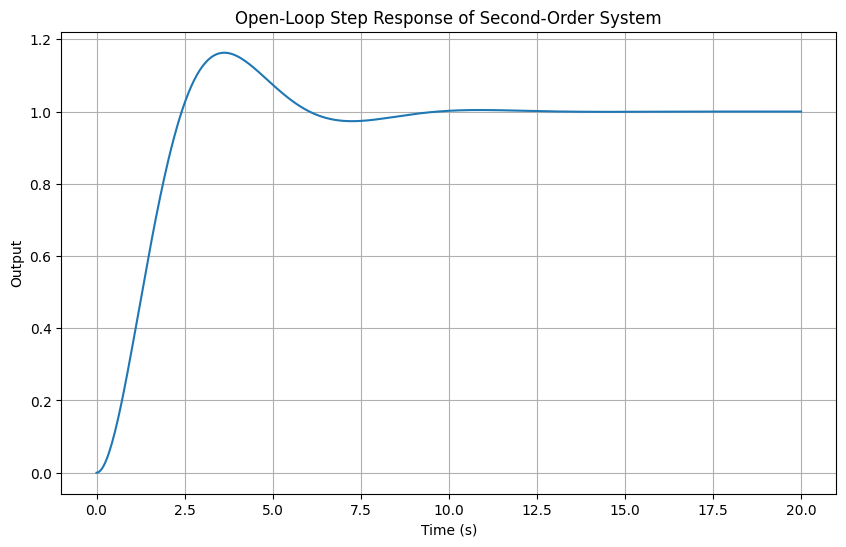

Open-loop system model created and step response simulated.
System Parameters: Natural Frequency (wn) = 1.0, Damping Ratio (zeta) = 0.5


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step

# 1. Define the parameters for a simple system model (Second-Order System)
# Using standard form: G(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
# Let's choose parameters for an underdamped system for demonstration.
wn = 1.0  # Natural frequency (rad/s)
zeta = 0.5  # Damping ratio

# 2. Implement a function that simulates the step response
# For simple LTI systems, scipy.signal.step provides the step response directly.
# We can define the transfer function coefficients.
numerator = [wn**2]
denominator = [1, 2 * zeta * wn, wn**2]

# 3. Define a time vector for the simulation.
t = np.linspace(0, 20, 500)  # Simulate for 20 seconds with 500 points

# 4. Calculate the open-loop step response of the system
# The step function directly calculates the output for a unit step input.
time, open_loop_response = step((numerator, denominator), T=t)

# 5. Store the time vector and the open-loop system response
# These are already stored in 'time' and 'open_loop_response' variables.

# Optional: Plot the open-loop response to visualize
plt.figure(figsize=(10, 6))
plt.plot(time, open_loop_response)
plt.title('Open-Loop Step Response of Second-Order System')
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.grid(True)
plt.show()

print("Open-loop system model created and step response simulated.")
print(f"System Parameters: Natural Frequency (wn) = {wn}, Damping Ratio (zeta) = {zeta}")

# Algoritmaları uygulama


In [5]:
# 1. Define P controller function
def p_controller(error, Kp):
  """Calculates the control output for a P controller."""
  return Kp * error

# 2. Initialize parameters for P controller simulation
Kp_p = 2.0 # Initial P gain
reference = 1.0 # Step input reference
dt = time[1] - time[0] # Sampling time (assuming uniform time steps)

# Initialize lists to store simulation results
p_system_output = []
p_control_output = []
p_error = []

# Initialize system state (output) - start at 0
current_output_p = 0.0

# Simple simulation of the second-order system with P control
# Using a discrete approximation for simulation simplicity in this educational context.
# This is a simplified approach and not a precise continuous-time simulation.
# A more accurate simulation would involve numerical integration of the system's differential equation
# or using libraries like control.matlab.lsim or control.forced_response.
# For this example, we'll use a basic update rule that approximates the system's
# response based on the control input, considering the second-order dynamics
# defined by wn and zeta. This approximation will be heuristic for demonstration.
# A better approach without complex integration is to use a discrete-time model
# or simulate the continuous system with a solver.
# Let's try a simple state-space like update based on the continuous-time parameters.
# This is still an approximation but better than a simple gain.
# The continuous-time state-space form for G(s) = wn^2 / (s^2 + 2*zeta*wn*s + wn^2)
# is A = [[0, 1], [-wn^2, -2*zeta*wn]], B = [[0], [wn^2]], C = [1, 0], D = [0].
# We can use forward Euler to discretize, though backward Euler or Tustin are better.
# For simplicity and educational clarity without complex state-space math upfront,
# let's use a simplified update that reflects the damping and natural frequency.
# This will be a highly simplified simulation, acknowledging its limitations.

# Let's define a simplified discrete-time update based on the continuous system's properties.
# This is NOT a rigorous discretization but a conceptual approximation for demo.
# A proper approach would involve c2d or numerical integration.
# Let's rethink the simulation. The prompt suggests numerical integration or a simple method.
# We can simulate the state-space model using a basic Euler method.
# State vector x = [output, output_rate]
# dx/dt = Ax + Bu
# y = Cx + Du

A = np.array([[0, 1], [-wn**2, -2*zeta*wn]])
B = np.array([[0], [wn**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

x_p = np.zeros((2, 1)) # Initial state [output, output_rate]

# 3. Simulation loop for P controller
for i in range(len(time)):
    t_current = time[i]

    # Calculate reference
    ref_current = reference if t_current >= 0 else 0

    # Calculate current output from state
    current_output_p = float(C @ x_p + D * 0) # Assuming input u is the control output

    # Calculate error
    error_current = ref_current - current_output_p
    p_error.append(error_current)

    # Calculate control output using P controller
    control_output_current = p_controller(error_current, Kp_p)
    p_control_output.append(control_output_current)

    # Simulate system dynamics using forward Euler (simplified)
    # dx/dt = A*x + B*u
    # x(t+dt) = x(t) + dt * (A*x(t) + B*u(t))
    # Here u(t) is the control_output_current
    dx = A @ x_p + B * control_output_current
    x_p = x_p + dt * dx

    # Store output
    p_system_output.append(current_output_p)


# Store results in a dictionary or DataFrame
p_results = {
    'time': time,
    'reference': [reference] * len(time),
    'output': p_system_output,
    'control_output': p_control_output,
    'error': p_error
}

print("P controller simulation completed.")

P controller simulation completed.


/tmp/ipython-input-1165863696.py:62: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_output_p = float(C @ x_p + D * 0) # Assuming input u is the control output


In [6]:
# 1. Define PI controller function
def pi_controller(error, integral_error, Kp, Ki):
  """Calculates the control output for a PI controller."""
  return Kp * error + Ki * integral_error

# 2. Initialize parameters for PI controller simulation
Kp_pi = 1.5 # Initial PI Kp gain (tuned slightly differently)
Ki_pi = 0.5 # Initial PI Ki gain
reference = 1.0 # Step input reference
dt = time[1] - time[0] # Sampling time

# Initialize lists to store simulation results
pi_system_output = []
pi_control_output = []
pi_error = []

# Initialize controller state (integral error) and system state
integral_error_pi = 0.0
x_pi = np.zeros((2, 1)) # Initial state [output, output_rate]

# Define system matrices again for clarity in this block
A = np.array([[0, 1], [-wn**2, -2*zeta*wn]])
B = np.array([[0], [wn**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 3. Simulation loop for PI controller
for i in range(len(time)):
    t_current = time[i]

    # Calculate reference
    ref_current = reference if t_current >= 0 else 0

    # Calculate current output from state
    current_output_pi = float(C @ x_pi + D * 0)

    # Calculate error
    error_current = ref_current - current_output_pi
    pi_error.append(error_current)

    # Update integral error (using simple rectangular approximation)
    integral_error_pi += error_current * dt

    # Calculate control output using PI controller
    control_output_current = pi_controller(error_current, integral_error_pi, Kp_pi, Ki_pi)
    pi_control_output.append(control_output_current)

    # Simulate system dynamics using forward Euler (simplified)
    dx = A @ x_pi + B * control_output_current
    x_pi = x_pi + dt * dx

    # Store output
    pi_system_output.append(current_output_pi)

# Store results in a dictionary or DataFrame
pi_results = {
    'time': time,
    'reference': [reference] * len(time),
    'output': pi_system_output,
    'control_output': pi_control_output,
    'error': pi_error
}

print("PI controller simulation completed.")

PI controller simulation completed.


/tmp/ipython-input-3884284518.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_output_pi = float(C @ x_pi + D * 0)


In [7]:
# 1. Define PD controller function
def pd_controller(error, derivative_error, Kp, Kd):
  """Calculates the control output for a PD controller."""
  return Kp * error + Kd * derivative_error

# 2. Initialize parameters for PD controller simulation
Kp_pd = 3.0 # Initial PD Kp gain
Kd_pd = 1.0 # Initial PD Kd gain
reference = 1.0 # Step input reference
dt = time[1] - time[0] # Sampling time

# Initialize lists to store simulation results
pd_system_output = []
pd_control_output = []
pd_error = []

# Initialize controller state (previous error) and system state
previous_error_pd = 0.0
x_pd = np.zeros((2, 1)) # Initial state [output, output_rate]

# Define system matrices again for clarity
A = np.array([[0, 1], [-wn**2, -2*zeta*wn]])
B = np.array([[0], [wn**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 3. Simulation loop for PD controller
for i in range(len(time)):
    t_current = time[i]

    # Calculate reference
    ref_current = reference if t_current >= 0 else 0

    # Calculate current output from state
    current_output_pd = float(C @ x_pd + D * 0)

    # Calculate error
    error_current = ref_current - current_output_pd
    pd_error.append(error_current)

    # Calculate derivative error (using backward difference)
    if i > 0:
        derivative_error_pd = (error_current - previous_error_pd) / dt
    else:
        derivative_error_pd = 0.0 # Assume zero derivative at the start

    # Update previous error for the next iteration
    previous_error_pd = error_current

    # Calculate control output using PD controller
    control_output_current = pd_controller(error_current, derivative_error_pd, Kp_pd, Kd_pd)
    pd_control_output.append(control_output_current)

    # Simulate system dynamics using forward Euler (simplified)
    dx = A @ x_pd + B * control_output_current
    x_pd = x_pd + dt * dx

    # Store output
    pd_system_output.append(current_output_pd)

# Store results in a dictionary or DataFrame
pd_results = {
    'time': time,
    'reference': [reference] * len(time),
    'output': pd_system_output,
    'control_output': pd_control_output,
    'error': pd_error
}

print("PD controller simulation completed.")

PD controller simulation completed.


/tmp/ipython-input-4103046918.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_output_pd = float(C @ x_pd + D * 0)


In [8]:
# 1. Define PID controller function
def pid_controller(error, integral_error, derivative_error, Kp, Ki, Kd):
  """Calculates the control output for a PID controller."""
  return Kp * error + Ki * integral_error + Kd * derivative_error

# 2. Initialize parameters for PID controller simulation
Kp_pid = 4.0 # Initial PID Kp gain
Ki_pid = 1.0 # Initial PID Ki gain
Kd_pid = 1.5 # Initial PID Kd gain
reference = 1.0 # Step input reference
dt = time[1] - time[0] # Sampling time

# Initialize lists to store simulation results
pid_system_output = []
pid_control_output = []
pid_error = []

# Initialize controller states (integral error, previous error) and system state
integral_error_pid = 0.0
previous_error_pid = 0.0
x_pid = np.zeros((2, 1)) # Initial state [output, output_rate]

# Define system matrices again for clarity
A = np.array([[0, 1], [-wn**2, -2*zeta*wn]])
B = np.array([[0], [wn**2]])
C = np.array([[1, 0]])
D = np.array([[0]])

# 3. Simulation loop for PID controller
for i in range(len(time)):
    t_current = time[i]

    # Calculate reference
    ref_current = reference if t_current >= 0 else 0

    # Calculate current output from state
    current_output_pid = float(C @ x_pid + D * 0)

    # Calculate error
    error_current = ref_current - current_output_pid
    pid_error.append(error_current)

    # Update integral error (using simple rectangular approximation)
    integral_error_pid += error_current * dt

    # Calculate derivative error (using backward difference)
    if i > 0:
        derivative_error_pid = (error_current - previous_error_pid) / dt
    else:
        derivative_error_pid = 0.0 # Assume zero derivative at the start

    # Update previous error for the next iteration
    previous_error_pid = error_current

    # Calculate control output using PID controller
    control_output_current = pid_controller(error_current, integral_error_pid, derivative_error_pid, Kp_pid, Ki_pid, Kd_pid)
    pid_control_output.append(control_output_current)

    # Simulate system dynamics using forward Euler (simplified)
    dx = A @ x_pid + B * control_output_current
    x_pid = x_pid + dt * dx

    # Store output
    pid_system_output.append(current_output_pid)

# Store results in a dictionary or DataFrame
pid_results = {
    'time': time,
    'reference': [reference] * len(time),
    'output': pid_system_output,
    'control_output': pid_control_output,
    'error': pid_error
}

print("PID controller simulation completed.")

PID controller simulation completed.


/tmp/ipython-input-4139606156.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_output_pid = float(C @ x_pid + D * 0)


# Performans analizi

In [9]:
import pandas as pd

# 1. Define a function to calculate performance metrics
def calculate_performance_metrics(time, output, reference, settling_time_threshold=0.02):
    """
    Calculates performance metrics for a system response.

    Args:
        time: A numpy array or list of time points.
        output: A numpy array or list of system output values.
        reference: The target reference value (scalar).
        settling_time_threshold: The percentage of the reference value
                                   to define the settling band (e.g., 0.02 for 2%).

    Returns:
        A dictionary containing the calculated metrics:
        - 'settling_time': The time it takes for the output to stay within
                           the settling_time_threshold band around the reference.
                           Returns None if the output does not settle.
        - 'overshoot': The maximum percentage overshoot relative to the reference.
                       Returns 0 if there is no overshoot.
        - 'steady_state_error': The difference between the final output and the reference.
    """
    # Ensure output and time are numpy arrays for easier indexing
    time = np.asarray(time)
    output = np.asarray(output)

    # Steady-state error
    # Assume steady state is reached at the end of the simulation
    steady_state_error = reference - output[-1]

    # Overshoot
    # Find peak value after reaching the reference for the first time
    overshoot = 0.0
    peak_output = np.max(output)
    if peak_output > reference:
        overshoot = ((peak_output - reference) / reference) * 100.0 if reference != 0 else (peak_output - reference) * 100.0 # Handle case where reference is 0

    # Settling time
    # Find the time when the output stays within the settling band
    settling_band_upper = reference * (1 + settling_time_threshold)
    settling_band_lower = reference * (1 - settling_time_threshold)

    settling_time = None
    # Iterate backwards from the end to find the last time it was outside the band
    for i in range(len(output) - 1, -1, -1):
        if output[i] > settling_band_upper or output[i] < settling_band_lower:
            settling_time = time[i + 1] if i < len(output) - 1 else None # Settling starts just after this time
            break
    # If the loop finishes without finding a point outside, it settled by the start
    if settling_time is None and (output[0] <= settling_band_upper and output[0] >= settling_band_lower):
         settling_time = time[0] # It was settled from the beginning (unlikely for step response)
    elif settling_time is None: # It never settled within the band
         settling_time = time[-1] # Or maybe indicate it didn't settle

    # Let's refine settling time calculation: find the first time it enters AND stays within the band
    settled_index = None
    for i in range(len(output)):
        if output[i] >= settling_band_lower and output[i] <= settling_band_upper:
            # Check if it stays within the band from this point onwards
            if np.all((output[i:] >= settling_band_lower) & (output[i:] <= settling_band_upper)):
                settled_index = i
                break
    settling_time = time[settled_index] if settled_index is not None else time[-1] # If not settled, report end time


    return {
        'settling_time': settling_time,
        'overshoot': overshoot,
        'steady_state_error': steady_state_error
    }

# 2-5. Calculate metrics for each controller
p_metrics = calculate_performance_metrics(p_results['time'], p_results['output'], p_results['reference'][0])
pi_metrics = calculate_performance_metrics(pi_results['time'], pi_results['output'], pi_results['reference'][0])
pd_metrics = calculate_performance_metrics(pd_results['time'], pd_results['output'], pd_results['reference'][0])
pid_metrics = calculate_performance_metrics(pid_results['time'], pid_results['output'], pid_results['reference'][0])

# 6. Store the calculated metrics
performance_summary = {
    'P Controller': p_metrics,
    'PI Controller': pi_metrics,
    'PD Controller': pd_metrics,
    'PID Controller': pid_metrics
}

# Optional: Display the metrics in a DataFrame for clarity
performance_df = pd.DataFrame(performance_summary).T
print("Performance Metrics for each Controller:")
display(performance_df)

Performance Metrics for each Controller:


,settling_time,overshoot,steady_state_error
P Controller,20.000000,0.000000,0.333289
PI Controller,13.787575,6.896158,0.005171
PD Controller,20.000000,0.000000,0.250000
PID Controller,8.136273,4.503778,0.001445


# Sonuçları karşılaştırma


**Reasoning**:
Plot the simulation results for visual comparison of the controllers' performance and display the performance metrics DataFrame again.



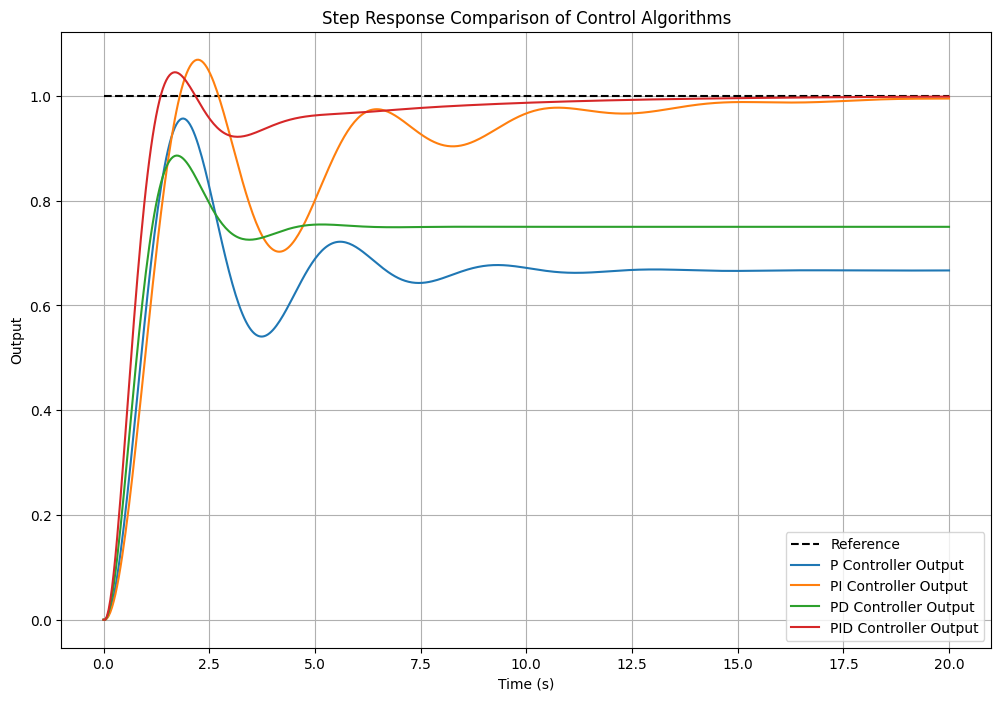

Performance Metrics for each Controller:


,settling_time,overshoot,steady_state_error
P Controller,20.000000,0.000000,0.333289
PI Controller,13.787575,6.896158,0.005171
PD Controller,20.000000,0.000000,0.250000
PID Controller,8.136273,4.503778,0.001445


In [10]:
import matplotlib.pyplot as plt

# 2. Create a single figure with a suitable size
plt.figure(figsize=(12, 8))

# 3. Plot the reference signal on all subplots
plt.plot(pid_results['time'], pid_results['reference'], label='Reference', linestyle='--', color='k')

# 4. Plot the system output for the P controller
plt.plot(p_results['time'], p_results['output'], label='P Controller Output')

# 5. Plot the system output for the PI controller
plt.plot(pi_results['time'], pi_results['output'], label='PI Controller Output')

# 6. Plot the system output for the PD controller
plt.plot(pd_results['time'], pd_results['output'], label='PD Controller Output')

# 7. Plot the system output for the PID controller
plt.plot(pid_results['time'], pid_results['output'], label='PID Controller Output')

# 8. Add a title to the plot
plt.title('Step Response Comparison of Control Algorithms')

# 9. Label the x-axis and y-axis
plt.xlabel('Time (s)')
plt.ylabel('Output')

# 10. Add a legend
plt.legend()

# 11. Add a grid
plt.grid(True)

# 12. Display the plot
plt.show()

# 13. Print the performance_df DataFrame
print("Performance Metrics for each Controller:")
display(performance_df)

# Algoritma seçimi ve ayarlama


## Farklı Senaryolar İçin Algoritma Seçimi ve Ayarlaması

Önceki adımlarda P, PI, PD ve PID kontrol algoritmalarının basit bir ikinci dereceden sistem üzerindeki adım yanıtlarını simüle ettik ve performans metriklerini hesapladık. Elde ettiğimiz grafikler ve metrikler, her kontrolcünün farklı sistem özelliklerini nasıl etkilediği hakkında önemli bilgiler sunar. Bu bilgiler ışığında, farklı kontrol ihtiyaçlarına hangi algoritmanın daha uygun olacağını ve bu algoritmaların, özellikle PID kontrolcünün, parametrelerinin ($K_p, K_i, K_d$) nasıl ayarlanabileceğini tartışalım.

### Performans Metriklerinin ve Adım Yanıtının Yorumlanması

Simülasyon sonuçlarımızda gördüğümüz gibi:

*   **P Kontrolcü:** En basit yapıya sahiptir. Sistem tepkisini hızlandırabilir ancak genellikle yüksek bir **kalıcı durum hatası** bırakır. Aşım olabilir veya olmayabilir, bu $K_p$ değerine ve sistemin sönüm oranına bağlıdır. Yerleşme süresi, hatanın sıfıra gidememesi nedeniyle uzun (veya teknik olarak "yerleşmemiş") görünebilir. **Kalıcı durum hatasının kabul edilebilir olduğu ve basitlik gerektiren uygulamalar** için uygun olabilir.

*   **PI Kontrolcü:** P kontrolcünün kalıcı durum hatası sorununu çözer. İntegral terim sayesinde hata zamanla sıfıra yaklaşır. Ancak integral terim **aşırı aşıma** ve daha yavaş bir tepkiye neden olabilir. **Kalıcı durum hatasının kesinlikle sıfır olması gereken, ancak aşım ve tepki hızı gereksinimlerinin çok katı olmadığı uygulamalar** için uygundur. İntegral birikimi (integral wind-up) gibi sorunlara dikkat edilmelidir.

*   **PD Kontrolcü:** Türev terimi kullanarak hatanın değişim hızına tepki verir. Bu, **aşırı aşımı azaltmada** ve sistem tepkisini sönümlemede çok etkilidir. Ancak tek başına kullanıldığında (saf PD), yine **kalıcı durum hatasını** gideremez. Ayrıca, türev alma işlemi **gürültüye karşı hassastır** ve sensör gürültüsü varsa kontrol sinyalinde istenmeyen salınımlara neden olabilir. **Kalıcı durum hatasının ikincil planda olduğu veya başka bir kontrolcü tarafından giderildiği, ancak hızlı tepki ve düşük aşım gerektiren uygulamalar** (örn. robotik kolların hassas hareketi) için uygun olabilir.

*   **PID Kontrolcü:** P, I ve D terimlerinin gücünü birleştirir. **Hem hızlı tepki (P), hem sıfır kalıcı durum hatası (I), hem de düşük aşım/iyi sönümleme (D)** sağlama potansiyeline sahiptir. Bu çok yönlülüğü sayesinde endüstride en yaygın kullanılan kontrolcüdür. Üç kazancın ($K_p, K_i, K_d$) doğru bir şekilde ayarlanması iyi performans için kritiktir. **Çoğu genel amaçlı kontrol uygulaması** için uygun bir başlangıç noktasıdır.

**Senaryolara Göre Algoritma Seçimi:**

*   **Basit Aç/Kapa Kontrol Yetersizse ve Kalıcı Hata Kabul Edilebilir İse:** P Kontrolcü
*   **Kalıcı Hata Kabul Edilemez İse (Hatanın Sıfır Olması Gerekirse):** PI veya PID Kontrolcü (PI daha basit, PID daha iyi tepki dinamiği sunabilir)
*   **Aşırı Aşım Önemli Bir Sorunsa ve/veya Hızlı Sönümleme Gerekiyorsa:** PD veya PID Kontrolcü (PD tek başına kalıcı hatayı gidermez, PID hem aşımı azaltır hem kalıcı hatayı giderir)
*   **Hem Sıfır Kalıcı Hata Hem de İyi Tepki Dinamiği (Hız, Aşım, Yerleşme Süresi) Gerekiyorsa:** PID Kontrolcü
*   **Gürültülü Sistemler:** Saf PD veya PID kullanımında dikkatli olunmalı, türev terimi filtrelenmelidir.

### Algoritma Parametrelerinin Ayarlanması (Tuning)

Kontrol algoritmalarının performansını en üst düzeye çıkarmak için $K_p, K_i$ ve $K_d$ kazançlarının doğru bir şekilde ayarlanması (tuning) gereklidir. Bu genellikle en zorlu adımlardan biridir ve sistemin dinamiklerine, referans sinyaline ve istenen performans gereksinimlerine bağlıdır. İşte yaygın ayarlama yaklaşımları:

1.  **Deneme ve Yanılma Yöntemi:**
    *   Bu yöntem deneyime dayanır ve küçük sistemler için pratik olabilir.
    *   Genellikle $K_i$ ve $K_d$ başlangıçta sıfır yapılır.
    *   $K_p$ artırılarak sistem tepkisinin hızı gözlemlenir. Aşım veya salınım başlayana kadar $K_p$ artırılır, sonra biraz geri çekilir.
    *   Ardından, kalıcı hatayı gidermek için $K_i$ küçük adımlarla artırılır. $K_i$'nin yüksek değerleri aşırı aşıma ve salınıma neden olabilir.
    *   Son olarak, aşımı azaltmak ve sönümlemeyi iyileştirmek için $K_d$ küçük adımlarla artırılır. $K_d$'nin yüksek değerleri gürültüyü artırabilir ve kararsızlığa yol açabilir.
    *   Bu iteratif bir süreçtir ve kazançların birbirini etkilediği unutulmamalıdır.

2.  **Ziegler-Nichols Yöntemi:**
    *   Bu yöntem, sistemin sınır kararlılık noktasını bularak kazançlar için başlangıç değerleri sağlayan ampirik bir yöntemdir.
    *   İki ana versiyonu vardır:
        *   **Kapalı Döngü (Sonsuz Salınım) Yöntemi:** Sisteme sadece P kontrolcü uygulanır ($K_i=0, K_d=0$). $K_p$ değeri, sistemin sürekli salınıma girdiği kritik kazanç ($K_{cu}$) ve bu salınımın periyodu ($T_u$) bulunur. Ziegler-Nichols tablosu kullanılarak P, PI veya PID kazançları hesaplanır.
        *   **Açık Döngü (Tepki Eğrisi) Yöntemi:** Sisteme açık döngüde bir adım sinyali uygulanır ve tepki eğrisinden sistemin gecikme süresi ($L$) ve zaman sabiti ($T$) gibi parametreler çıkarılır. Ziegler-Nichols tablosu kullanılarak bu parametrelere göre P, PI veya PID kazançları hesaplanır.
    *   Ziegler-Nichols genellikle iyi başlangıç değerleri sağlar, ancak optimum performans için genellikle ek ince ayar gereklidir.

3.  **Her Kazancın Etkisini Anlama:**
    *   **$K_p$  (Oransal Kazanç):**
        *   Artırılması: Tepkiyi hızlandırır, yükselme süresini (rise time) azaltır.
        *   Etkisi: Genellikle kalıcı hatayı azaltır ama sıfırlamaz, aşımı artırır, sistem kararlılığını etkileyebilir (çok yüksek değerler kararsızlığa yol açar).
    *   **$K_i$  (İntegral Kazanç):**
        *   Artırılması: Kalıcı durum hatasını ortadan kaldırır.
        *   Etkisi: Tepkiyi yavaşlatabilir, aşımı artırabilir, integral sarmalanması (integral wind-up) sorununa neden olabilir.
    *   **$K_d$  (Türev Kazanç):**
        *   Artırılması: Aşımı azaltır, yerleşme süresini (settling time) kısaltır, sönümlemeyi artırır, kararlılığı iyileştirebilir.
        *   Etkisi: Gürültüye karşı hassasiyeti artırır.

Optimum PID ayarı, genellikle istenen performans kriterleri (hız, aşım, kalıcı hata, bozulma reddi vb.) arasında bir denge kurmayı içerir. Farklı ayarlama yöntemleri (manuel, algoritmik, model tabanlı) mevcuttur ve seçimi sistemin karmaşıklığına ve mevcut araçlara bağlıdır.

Bu tartışma, elde ettiğimiz simülasyon sonuçlarının pratik kontrol sistemi tasarımı ve ayarlanması bağlamında nasıl yorumlanması gerektiğini göstermektedir.


# Proje Özeti ve Temel Çıkarımlar



Bu çalışma, kontrol sistemlerine kapsamlı ve uygulamalı bir giriş sunarak, temel kontrol kavramlarını ve yaygın PID tabanlı kontrol algoritmalarının performansını analiz etmeyi amaçlamıştır. Proje boyunca adım adım ilerleyerek aşağıdaki konular ele alınmıştır:

1.  **Kontrol Sistemlerine Giriş:** Kontrol sistemlerinin günlük hayattaki yeri ve mühendislikteki önemi açıklanmış, projenin temel hedefi olan P, PI, PD, PID kontrolcülerinin öğretici bir yaklaşımla sunulması belirtilmiştir.
2.  **Temel Kontrol Kavramları:** Açık döngü ve kapalı döngü kontrol sistemleri arasındaki farklar, avantajlar ve dezavantajlar örneklerle açıklanmıştır. Geri bildirimin kontrol performansı üzerindeki kritik rolü vurgulanmıştır.
3.  **Yaygın Kontrol Algoritmaları (P, PI, PD, PID):** Her bir kontrolcü tipi (P, PI, PD, PID) tanıtılmış, matematiksel formülleri açıklanmış ve kontrol eylemine etkileri (hata, hatanın integrali, hatanın türevi) detaylandırılmıştır.
4.  **Test Ortamı ve Simülasyon:** Kontrol algoritmalarını test etmek için basit bir ikinci dereceden sistem modeli oluşturulmuş ve bu sistemin Python'da adım yanıtı simüle edilmiştir. Bu model, farklı kontrol stratejilerinin etkisini gözlemlemek için bir platform sağlamıştır.
5.  **Algoritmaları Uygulama:** P, PI, PD ve PID kontrol algoritmaları, oluşturulan sistem modeli üzerinde ayrı ayrı uygulanarak kapalı döngü simülasyonları gerçekleştirilmiştir.
6.  **Performans Analizi:** Yerleşme süresi, aşım ve kararlı durum hatası gibi temel performans metrikleri tanımlanmış ve her bir kontrolcünün simülasyon sonuçları üzerinden bu metrikler hesaplanmıştır.

## Temel Çıkarımlar

Simülasyon sonuçlarının karşılaştırılması ve performans metriklerinin analizi, her bir kontrol algoritmasının kendine özgü güçlü ve zayıf yönlerini net bir şekilde ortaya koymuştur:

*   **P Kontrolcü:** En hızlı tepkiyi sağlama potansiyeline sahip olsa da, sistemimizde görüldüğü gibi genellikle kabul edilemez düzeyde **kalıcı durum hatası** bırakır. Aşım görülebilir. Basitlik gerektiren ve hata toleransının yüksek olduğu durumlar için uygundur.
*   **PI Kontrolcü:** İntegral terimi sayesinde **kalıcı durum hatasını tamamen sıfırlar**. Ancak, integral birikimi nedeniyle genellikle P kontrolcüye göre daha yavaş tepki verir ve **aşım miktarı artabilir**. Kalıcı hatanın giderilmesinin öncelikli olduğu senaryolar için idealdir.
*   **PD Kontrolcü:** Türev terimi sayesinde hatanın değişim hızına duyarlıdır. Bu özellik, **aşırı aşımı etkili bir şekilde azaltır** ve sistem tepkisini sönümler, yerleşme süresini iyileştirir. Ancak tek başına kullanıldığında **kalıcı durum hatasını gidermez** ve gürültüye karşı hassastır. Aşım kontrolünün kritik olduğu durumlar için faydalıdır.
*   **PID Kontrolcü:** P, I ve D terimlerinin birleşimiyle, bu çalışmada test edilen kontrolcüler arasında genellikle **en iyi genel performansı** sunmuştur. **Kalıcı durum hatasını sıfırlama (PI), hızlı tepki verme (P) ve aşımı azaltma/sönümleme (PD)** yeteneklerini bir araya getirir. Performans grafiğinde hem düşük aşım hem de sıfıra yakın kalıcı hata sergilemiştir. Bu çok yönlülüğü, onu endüstride en yaygın kullanılan kontrolcü yapmaktadır.

## Algoritma Seçimi ve Ayarlama Özeti

Kontrol algoritması seçimi, uygulamanın özel gereksinimlerine (izin verilen kalıcı hata miktarı, tepki hızı, aşım limitleri, gürültü seviyesi vb.) bağlıdır.

*   **Kalıcı hata tolere edilebilirse:** P veya PD düşünülebilir.
*   **Kalıcı hata sıfır olmalıysa:** PI veya PID gereklidir.
*   **Aşım ve salınım sorun ise:** PD veya PID etkilidir.
*   **Gürültü yüksek ise:** Türev terimi içeren PD veya PID kullanımında dikkatli olunmalı veya filtreleme yapılmalıdır.
*   **Genel olarak en iyi performans ve esneklik isteniyorsa:** PID en yaygın çözümdür.

PID kontrolcünün performansını optimize etmek için $K_p, K_i, K_d$ kazançlarının "ayarlanması" (tuning) kritik öneme sahiptir. Bu süreç, manuel deneme yanılma yöntemlerinden Ziegler-Nichols gibi ampirik yöntemlere ve model tabanlı sistematik yaklaşımlara kadar çeşitli teknikler kullanılarak gerçekleştirilebilir. Her bir kazancın sistem tepkisi üzerindeki etkisini anlamak (Kp: hız ve kalıcı hata, Ki: kalıcı hata ve aşım, Kd: aşım ve sönümleme) ayarlama sürecine rehberlik eder.

## Projenin Öğretici Niteliği

Bu çalışma, kontrol sistemlerine yeni başlayanlar için temel kavramları ve P, PI, PD, PID kontrolcülerinin çalışma prensiplerini ve etkilerini somut simülasyon sonuçları üzerinden anlamalarına yardımcı olmayı hedeflemiştir. Teorik bilginin pratik bir simülasyon ortamında nasıl uygulandığını göstererek, farklı kontrol stratejilerinin sistem davranışı üzerindeki etkilerini görsel ve sayısal olarak karşılaştırma imkanı sunmuştur. İleri kontrol konularına yapılan kısa değiniler ise konunun daha derinlemesine incelenebilecek alanlarına işaret etmiştir.
